In [2]:
import zipfile
import os
import numpy as np
from PIL import Image

## Unzipfile the give File

In [2]:
def extract_file(file_path):
    zipped = zipfile.ZipFile(file_path,'r')
    zipped.extractall('./')
    zipped.close()
    
extract_file('./cifar-3class-data.zip')

## Load Image Data and respective Labels

In [16]:
def Load_data(path):
    images = []
    labels = []
    for class_ in os.listdir(path):
        class_path = os.path.join(path,class_) # to join Class_i to path

        for img in os.listdir(class_path):
            img_path = os.path.join(class_path,img)
            image = Image.open(img_path)
            images.append(image)
            labels.append(int(class_[-1]))
    
    return np.array(images)/255,np.array(labels)

In [5]:
TRAIN_PATH = './cifar-3class-data/train/'
TEST_PATH = './cifar-3class-data/test/'

In [18]:
train,ytrain = Load_data(TRAIN_PATH)
test,ytest = Load_data(TEST_PATH)
len(train)

1500

## Plotting any 4 images

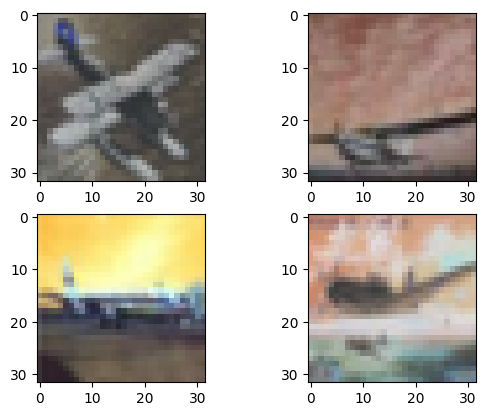

In [11]:
import matplotlib.pyplot as plt

figure, axis = plt.subplots(2, 2)
  
axis[0, 0].imshow(train[0])
axis[0, 1].imshow(train[1])
axis[1, 0].imshow(train[2])
axis[1, 1].imshow(train[3])

## Creating Validation data and Train data

In [12]:
from sklearn.model_selection import train_test_split
train,validation,ytrain,y_valid = train_test_split(train,ytrain,test_size = 0.1,random_state=42)
print(len(train),len(validation))

1350 150


## Function To Flatten Image to feed into FCNN

In [13]:
# image array  = 32*32*3 (3 are color channels)
# hence final = 1024*3 = 3072 after flatten

In [14]:
def flatten_img(data):
    temp = []
    for i in range(data.shape[0]):
        temp.append(list(data[i].flatten()))
    return np.array(temp)

In [15]:
def flatten_img1(data):
    temp = []
    for m in range(data.shape[0]):
        flatten = []
        for i in range(data.shape[1]):
            for j in range(data.shape[2]):
                for k in range(data.shape[3]):
                    flatten.append(data[m][i][j][k])

        temp.append(flatten)
    return np.array(temp)

In [16]:
train_trf = flatten_img1(train)
valid_trf = flatten_img1(validation)

## FCNN

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
def FCNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Dense(256,activation='relu',input_shape = (32*32*3,)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(3,activation='softmax')) # 3 output so as to get probability of test case to lie in all 3 classes
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model

## Accuracy Analysis

In [18]:
def Plot_Accuracy(history,xlen):
    plt.plot(np.arange(1,xlen+1),history.history['accuracy'],c = 'b',label = 'Accuracy')
    plt.plot(np.arange(1,xlen+1),history.history['val_accuracy'],c = 'r',label = 'Val-Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracies')
    plt.legend()
    plt.show()

In [19]:
def Model_Accuracy(ytest,pred_y):
    wrong_count = 0
    for i in range(len(ytest)): wrong_count += (ytest[i] != pred_y[i])

    acc1 = round((len(ytest) - wrong_count)/len(ytest) * 100,2)

    print(f"Accuracy  = {acc1}%")

## Running The Model

In [20]:
history,model = FCNN(train_trf,ytrain,valid_trf,y_valid,500,200)

Epoch 1/500
7/7 [==============================] - 1s 40ms/step - loss: 1.3615 - accuracy: 0.3356 - val_loss: 1.0580 - val_accuracy: 0.3867
Epoch 2/500
7/7 [==============================] - 0s 17ms/step - loss: 1.0460 - accuracy: 0.4533 - val_loss: 1.0784 - val_accuracy: 0.3733
Epoch 3/500
7/7 [==============================] - 0s 17ms/step - loss: 0.9722 - accuracy: 0.5185 - val_loss: 0.9227 - val_accuracy: 0.6133
Epoch 4/500
7/7 [==============================] - 0s 17ms/step - loss: 0.9330 - accuracy: 0.5830 - val_loss: 0.9339 - val_accuracy: 0.5867
Epoch 5/500
7/7 [==============================] - 0s 17ms/step - loss: 0.8825 - accuracy: 0.6156 - val_loss: 0.8723 - val_accuracy: 0.6333
Epoch 6/500
7/7 [==============================] - 0s 16ms/step - loss: 0.8115 - accuracy: 0.6652 - val_loss: 0.8470 - val_accuracy: 0.6400
Epoch 7/500
7/7 [==============================] - 0s 17ms/step - loss: 0.7822 - accuracy: 0.6748 - val_loss: 0.8259 - val_accuracy: 0.6800
Epoch 8/500
7/7 [===

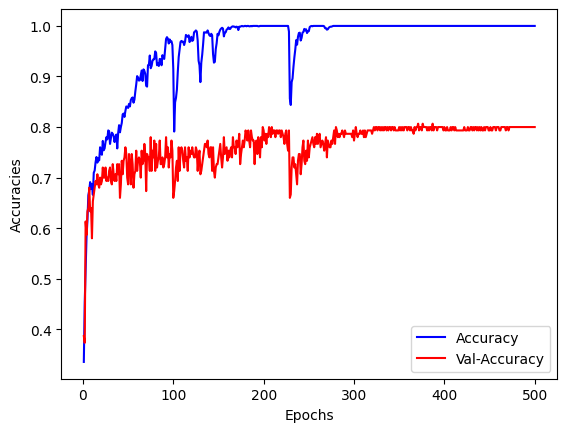

In [21]:
Plot_Accuracy(history,500)

## Prediction

In [22]:
test_trf = flatten_img1(test)

In [23]:
pred = model.predict(test_trf)

10/10 [==============================] - 0s 2ms/step


In [24]:
pred_y = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]

In [25]:
Model_Accuracy(pred_y,ytest)

Accuracy  = 76.33%


In [26]:
loss = model.evaluate(test_trf,ytest)[0]

10/10 [==============================] - 0s 2ms/step - loss: 2.3315 - accuracy: 0.7633


In [27]:
loss

2.3315298557281494

## CNN

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
def CNN(xtrain,ytrain,xvalid,yvalid,epochs,batch_size):
    model = Sequential()
    model.add(Conv2D(64,(3,3),input_shape = (32,32,3),padding='same',activation='relu'))
    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D((2,2),padding='valid'))

    model.add(Flatten())

    model.add(Dense(512,activation='relu'))
    model.add(Dense(100,activation='relu'))
    
    model.add(Dense(3,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    history = model.fit(xtrain,ytrain,validation_data=(xvalid,yvalid),batch_size=batch_size,epochs=epochs)

    return history,model   

In [ ]:
validation.shape

(150, 32, 32, 3)

## Running The CNN Model

In [ ]:
history_CNN,model = CNN(train,ytrain,validation,y_valid,50,200)

Epoch 1/50
7/7 [==============================] - 6s 682ms/step - loss: 1.1161 - accuracy: 0.3370 - val_loss: 1.0940 - val_accuracy: 0.2733
Epoch 2/50
7/7 [==============================] - 4s 641ms/step - loss: 1.0307 - accuracy: 0.4822 - val_loss: 0.9452 - val_accuracy: 0.6933
Epoch 3/50
7/7 [==============================] - 5s 637ms/step - loss: 1.0272 - accuracy: 0.5052 - val_loss: 0.9973 - val_accuracy: 0.6733
Epoch 4/50
7/7 [==============================] - 4s 615ms/step - loss: 0.8860 - accuracy: 0.6259 - val_loss: 0.9273 - val_accuracy: 0.6333
Epoch 5/50
7/7 [==============================] - 4s 610ms/step - loss: 0.7222 - accuracy: 0.7044 - val_loss: 0.8334 - val_accuracy: 0.6533
Epoch 6/50
7/7 [==============================] - 5s 659ms/step - loss: 0.6534 - accuracy: 0.7304 - val_loss: 0.7044 - val_accuracy: 0.7000
Epoch 7/50
7/7 [==============================] - 5s 654ms/step - loss: 0.5589 - accuracy: 0.7674 - val_loss: 0.6406 - val_accuracy: 0.7000
Epoch 8/50
7/7 [====

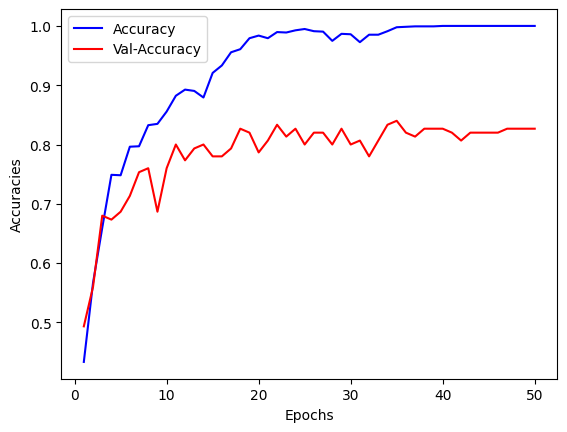

In [ ]:
Plot_Accuracy(history_CNN,50)

## Prediction

In [ ]:
pred = model.predict(test)

10/10 [==============================] - 0s 24ms/step


In [ ]:
print(pred.shape)
pred

(300, 3)


array([[1.00000000e+00, 4.72652353e-08, 3.76290332e-09],
       [9.95625854e-01, 6.61455033e-08, 4.37395507e-03],
       [1.00000000e+00, 2.30333521e-15, 1.44648507e-08],
       [9.55489993e-01, 4.62856224e-05, 4.44637462e-02],
       [9.99996662e-01, 3.28371584e-06, 4.49366278e-09],
       [1.82289019e-01, 8.42278078e-03, 8.09288204e-01],
       [5.07592747e-04, 9.99492407e-01, 7.47570172e-10],
       [9.99999881e-01, 1.12802709e-07, 4.54688472e-15],
       [9.89152074e-01, 7.18036617e-08, 1.08478125e-02],
       [6.76801370e-04, 2.77977152e-09, 9.99323249e-01],
       [1.00000000e+00, 1.72077012e-12, 4.06618177e-11],
       [9.99997020e-01, 7.45171459e-12, 2.96205098e-06],
       [8.93425022e-04, 9.92171645e-01, 6.93486165e-03],
       [6.17920935e-01, 2.71221280e-01, 1.10857815e-01],
       [9.99850869e-01, 1.72764355e-11, 1.49094732e-04],
       [9.99998569e-01, 7.78042661e-08, 1.26425743e-06],
       [9.99999166e-01, 8.52306357e-07, 5.86007839e-11],
       [9.12338793e-02, 9.08738

In [ ]:
pred_y_CNN = [np.where(pred[i] == max(pred[i]))[0][0] for i in range(pred.shape[0])]

In [ ]:
Model_Accuracy(pred_y_CNN,ytest)

Accuracy  = 85.67%


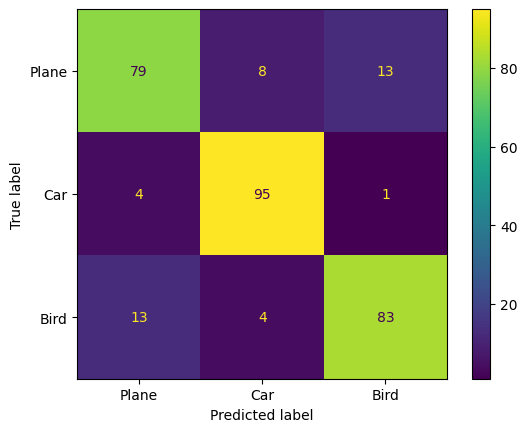

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
CM = confusion_matrix(ytest,pred_y_CNN)
ConfusionMatrixDisplay(CM,display_labels=['Plane','Car','Bird']).plot()